# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
# data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

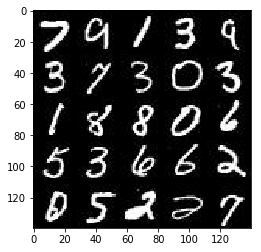

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

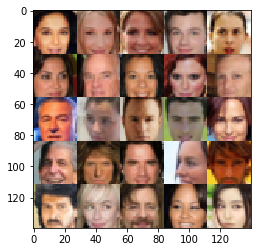

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learn_rate = tf.placeholder(tf.float32)
    return input_real, input_z, learn_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def leaky_relu(x, alpha=0.05, name='leaky_relu'):
    return tf.maximum(x, alpha*x, name=name)

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # 28x28x1
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        relu1 = leaky_relu(x1)
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = leaky_relu(bn2)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = leaky_relu(bn3)
        
        x4 = tf.layers.conv2d(relu2, 512, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn4 = tf.layers.batch_normalization(x4, training=True)
        relu4 = leaky_relu(bn4)


        flat = tf.contrib.layers.flatten(relu4)
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    
    
    
    with tf.variable_scope('generator', reuse=not is_train):
        x1 = tf.layers.dense(z, 4*4*1024)
        
        x2 = tf.reshape(x1, (-1, 4, 4, 1024))
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = leaky_relu(x2)

        x3 = tf.layers.conv2d_transpose(x2, 512, 4, strides=1, padding='valid', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = leaky_relu(x3)
        
        x4 = tf.layers.conv2d_transpose(x3, 256, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = leaky_relu(x4)
        
        x5 = tf.layers.conv2d_transpose(x4, 128, 5, strides=1, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x5 = tf.layers.batch_normalization(x5, training=is_train)
        x5 = leaky_relu(x5)
        

        
        logits = tf.layers.conv2d_transpose(x5, out_channel_dim, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
    
        out = tf.tanh(logits)
    return out



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, True)
    
    smooth = 0.1
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1.0-smooth)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list = d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list = g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, learn_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    steps = 0
    
    
    samples = []
    losses = []
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images = batch_images*2.0
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z:batch_z, input_real:batch_images, learn_rate: learning_rate} )
                _ = sess.run(g_opt, feed_dict={input_z:batch_z, input_real:batch_images, learn_rate: learning_rate} )
                _ = sess.run(g_opt, feed_dict={input_z:batch_z, input_real:batch_images, learn_rate: learning_rate} )

                if steps % 20 ==0:
                    train_loss_d = d_loss.eval({input_real:batch_images, input_z:batch_z})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                    losses.append((train_loss_d, train_loss_g))
                    
                if steps % 100 == 0:
                    
                    show_generator_output(sess, 3, input_z, data_shape[3], data_image_mode)
    

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 3.7706... Generator Loss: 0.1162
Epoch 1/2... Discriminator Loss: 1.7313... Generator Loss: 1.1326
Epoch 1/2... Discriminator Loss: 1.9985... Generator Loss: 0.4331
Epoch 1/2... Discriminator Loss: 1.7361... Generator Loss: 0.8352
Epoch 1/2... Discriminator Loss: 1.9082... Generator Loss: 0.3664


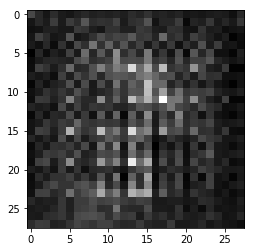

Epoch 1/2... Discriminator Loss: 1.9786... Generator Loss: 0.3002
Epoch 1/2... Discriminator Loss: 1.6369... Generator Loss: 0.4865


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.3 #this was 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/2... Discriminator Loss: 3.4370... Generator Loss: 1.6983
Epoch 1/2... Discriminator Loss: 2.3677... Generator Loss: 0.3019
Epoch 1/2... Discriminator Loss: 2.1825... Generator Loss: 0.2417
Epoch 1/2... Discriminator Loss: 1.6198... Generator Loss: 0.6358
Epoch 1/2... Discriminator Loss: 1.9239... Generator Loss: 0.5597


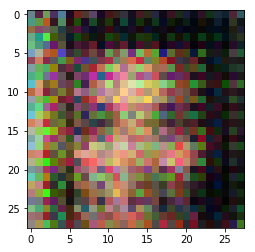

Epoch 1/2... Discriminator Loss: 1.7357... Generator Loss: 0.5586
Epoch 1/2... Discriminator Loss: 1.9051... Generator Loss: 0.4532
Epoch 1/2... Discriminator Loss: 1.8053... Generator Loss: 0.8095
Epoch 1/2... Discriminator Loss: 1.5961... Generator Loss: 0.7203
Epoch 1/2... Discriminator Loss: 1.6570... Generator Loss: 0.3978


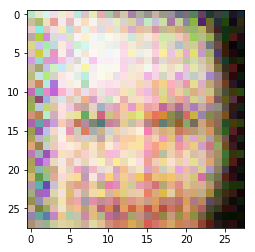

Epoch 1/2... Discriminator Loss: 1.5030... Generator Loss: 0.7194
Epoch 1/2... Discriminator Loss: 2.1834... Generator Loss: 1.4275
Epoch 1/2... Discriminator Loss: 1.5850... Generator Loss: 0.8383
Epoch 1/2... Discriminator Loss: 1.6859... Generator Loss: 0.6928
Epoch 1/2... Discriminator Loss: 1.5692... Generator Loss: 0.6960


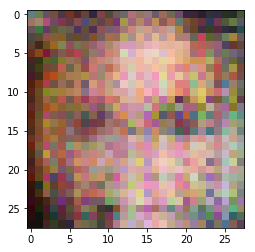

Epoch 1/2... Discriminator Loss: 1.5411... Generator Loss: 0.4581
Epoch 1/2... Discriminator Loss: 1.6051... Generator Loss: 0.7786
Epoch 1/2... Discriminator Loss: 1.5732... Generator Loss: 0.5847
Epoch 1/2... Discriminator Loss: 1.5798... Generator Loss: 0.7401
Epoch 1/2... Discriminator Loss: 1.4429... Generator Loss: 0.6780


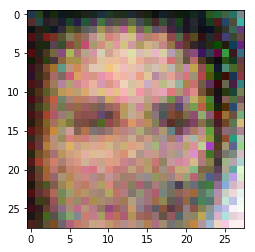

Epoch 1/2... Discriminator Loss: 1.4903... Generator Loss: 0.7926
Epoch 1/2... Discriminator Loss: 1.6835... Generator Loss: 0.3846
Epoch 1/2... Discriminator Loss: 1.7468... Generator Loss: 0.3380
Epoch 1/2... Discriminator Loss: 1.7430... Generator Loss: 0.3584
Epoch 1/2... Discriminator Loss: 1.5983... Generator Loss: 0.9038


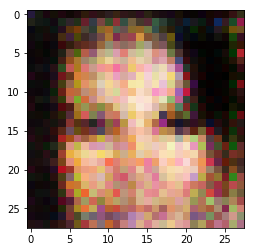

Epoch 1/2... Discriminator Loss: 1.5574... Generator Loss: 0.6469
Epoch 1/2... Discriminator Loss: 1.5080... Generator Loss: 0.5684
Epoch 1/2... Discriminator Loss: 1.6007... Generator Loss: 0.4750
Epoch 1/2... Discriminator Loss: 1.6474... Generator Loss: 0.4259
Epoch 1/2... Discriminator Loss: 1.4390... Generator Loss: 0.9551


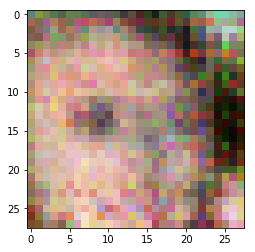

Epoch 1/2... Discriminator Loss: 1.5740... Generator Loss: 0.4400
Epoch 1/2... Discriminator Loss: 1.8027... Generator Loss: 0.3242
Epoch 1/2... Discriminator Loss: 1.5278... Generator Loss: 0.7485
Epoch 1/2... Discriminator Loss: 1.4001... Generator Loss: 0.9435
Epoch 1/2... Discriminator Loss: 1.5724... Generator Loss: 1.1708


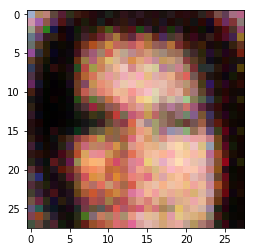

Epoch 1/2... Discriminator Loss: 1.5340... Generator Loss: 0.9731
Epoch 1/2... Discriminator Loss: 1.4994... Generator Loss: 0.8201
Epoch 1/2... Discriminator Loss: 1.5493... Generator Loss: 0.8264
Epoch 1/2... Discriminator Loss: 1.4879... Generator Loss: 0.6262
Epoch 1/2... Discriminator Loss: 1.5590... Generator Loss: 1.1264


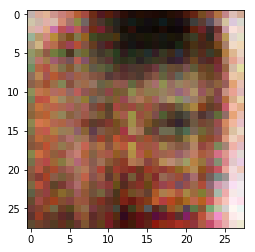

Epoch 1/2... Discriminator Loss: 1.5767... Generator Loss: 0.5092
Epoch 1/2... Discriminator Loss: 1.5648... Generator Loss: 0.9904
Epoch 1/2... Discriminator Loss: 1.4681... Generator Loss: 0.6153
Epoch 1/2... Discriminator Loss: 1.5205... Generator Loss: 0.6276
Epoch 1/2... Discriminator Loss: 1.4188... Generator Loss: 0.8345


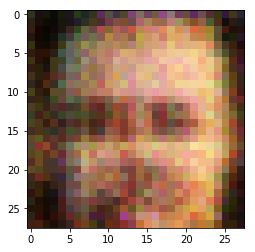

Epoch 1/2... Discriminator Loss: 1.4400... Generator Loss: 0.8300
Epoch 1/2... Discriminator Loss: 1.4074... Generator Loss: 0.7418
Epoch 1/2... Discriminator Loss: 1.5308... Generator Loss: 0.4991
Epoch 1/2... Discriminator Loss: 1.4423... Generator Loss: 0.8497
Epoch 1/2... Discriminator Loss: 1.4316... Generator Loss: 0.8416


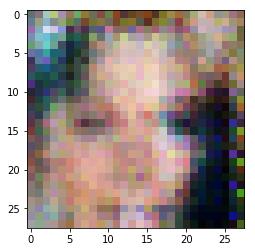

Epoch 1/2... Discriminator Loss: 1.4478... Generator Loss: 0.7471
Epoch 1/2... Discriminator Loss: 1.4833... Generator Loss: 0.5922
Epoch 1/2... Discriminator Loss: 1.4758... Generator Loss: 0.5605
Epoch 1/2... Discriminator Loss: 1.6578... Generator Loss: 0.3687
Epoch 1/2... Discriminator Loss: 1.4865... Generator Loss: 0.5996


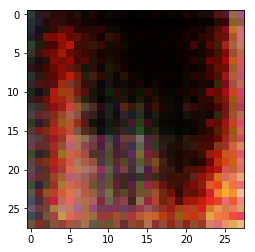

Epoch 1/2... Discriminator Loss: 1.4681... Generator Loss: 0.6469
Epoch 1/2... Discriminator Loss: 1.5169... Generator Loss: 0.5390
Epoch 1/2... Discriminator Loss: 1.4027... Generator Loss: 0.9272
Epoch 1/2... Discriminator Loss: 1.4279... Generator Loss: 0.6323
Epoch 1/2... Discriminator Loss: 1.4189... Generator Loss: 0.8714


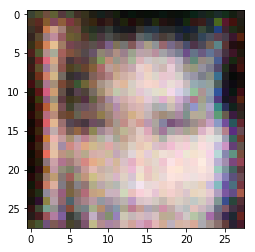

Epoch 1/2... Discriminator Loss: 1.5097... Generator Loss: 0.5817
Epoch 1/2... Discriminator Loss: 1.5003... Generator Loss: 0.5638
Epoch 1/2... Discriminator Loss: 1.4385... Generator Loss: 0.7881
Epoch 1/2... Discriminator Loss: 1.3982... Generator Loss: 0.7410
Epoch 1/2... Discriminator Loss: 1.5034... Generator Loss: 0.6206


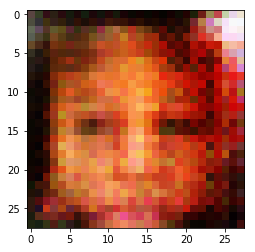

Epoch 1/2... Discriminator Loss: 1.3938... Generator Loss: 0.5983
Epoch 1/2... Discriminator Loss: 1.5707... Generator Loss: 0.4248
Epoch 1/2... Discriminator Loss: 1.5459... Generator Loss: 0.9233
Epoch 1/2... Discriminator Loss: 1.4001... Generator Loss: 0.7179
Epoch 1/2... Discriminator Loss: 1.4738... Generator Loss: 0.7763


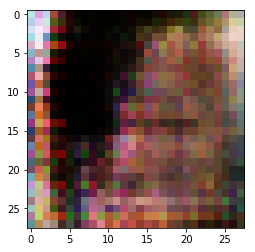

Epoch 1/2... Discriminator Loss: 1.5783... Generator Loss: 0.5236
Epoch 1/2... Discriminator Loss: 1.3837... Generator Loss: 0.7962
Epoch 1/2... Discriminator Loss: 1.4251... Generator Loss: 0.7732
Epoch 1/2... Discriminator Loss: 1.4168... Generator Loss: 0.8207
Epoch 1/2... Discriminator Loss: 1.4310... Generator Loss: 0.8642


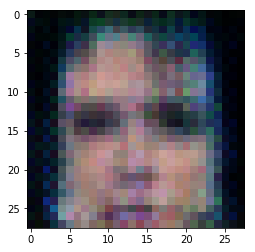

Epoch 1/2... Discriminator Loss: 1.4553... Generator Loss: 0.5873
Epoch 1/2... Discriminator Loss: 1.4872... Generator Loss: 0.8904
Epoch 1/2... Discriminator Loss: 1.3990... Generator Loss: 0.7705
Epoch 1/2... Discriminator Loss: 1.4615... Generator Loss: 0.8596
Epoch 1/2... Discriminator Loss: 1.5111... Generator Loss: 0.8235


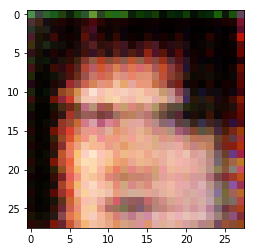

Epoch 1/2... Discriminator Loss: 1.4854... Generator Loss: 0.6570
Epoch 1/2... Discriminator Loss: 1.5196... Generator Loss: 0.4794
Epoch 1/2... Discriminator Loss: 1.5775... Generator Loss: 0.9668
Epoch 1/2... Discriminator Loss: 1.4629... Generator Loss: 0.5778
Epoch 1/2... Discriminator Loss: 1.4465... Generator Loss: 0.8156


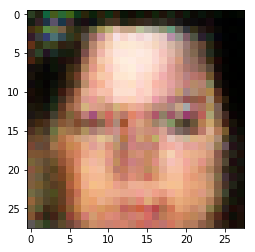

Epoch 1/2... Discriminator Loss: 1.4592... Generator Loss: 0.9344
Epoch 1/2... Discriminator Loss: 1.3881... Generator Loss: 0.8578
Epoch 1/2... Discriminator Loss: 1.3462... Generator Loss: 0.8105
Epoch 1/2... Discriminator Loss: 1.4636... Generator Loss: 0.6454
Epoch 1/2... Discriminator Loss: 1.5569... Generator Loss: 0.6181


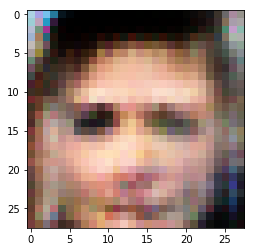

Epoch 1/2... Discriminator Loss: 1.4131... Generator Loss: 0.8792
Epoch 1/2... Discriminator Loss: 1.4641... Generator Loss: 0.5154
Epoch 1/2... Discriminator Loss: 1.3586... Generator Loss: 0.7708
Epoch 1/2... Discriminator Loss: 1.3010... Generator Loss: 0.8220
Epoch 1/2... Discriminator Loss: 1.4273... Generator Loss: 0.7844


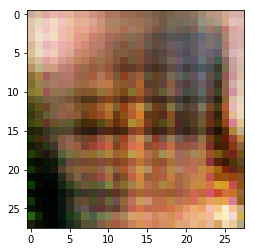

Epoch 1/2... Discriminator Loss: 1.5554... Generator Loss: 0.5258
Epoch 1/2... Discriminator Loss: 1.4574... Generator Loss: 0.5552
Epoch 1/2... Discriminator Loss: 1.3593... Generator Loss: 0.6385
Epoch 1/2... Discriminator Loss: 1.4362... Generator Loss: 0.7302
Epoch 1/2... Discriminator Loss: 1.3286... Generator Loss: 0.6037


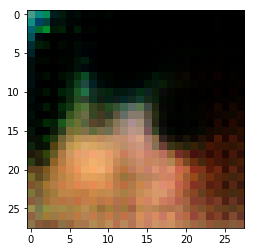

Epoch 1/2... Discriminator Loss: 1.4764... Generator Loss: 0.7839
Epoch 1/2... Discriminator Loss: 1.3538... Generator Loss: 0.6471
Epoch 1/2... Discriminator Loss: 1.3629... Generator Loss: 0.8960
Epoch 1/2... Discriminator Loss: 1.4109... Generator Loss: 0.8450
Epoch 1/2... Discriminator Loss: 1.3684... Generator Loss: 0.7190


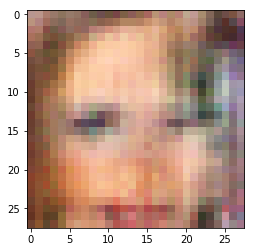

Epoch 1/2... Discriminator Loss: 1.3950... Generator Loss: 0.9481
Epoch 1/2... Discriminator Loss: 1.4331... Generator Loss: 0.9285
Epoch 1/2... Discriminator Loss: 1.5104... Generator Loss: 0.5371
Epoch 1/2... Discriminator Loss: 1.3846... Generator Loss: 0.8122
Epoch 1/2... Discriminator Loss: 1.4139... Generator Loss: 0.8213


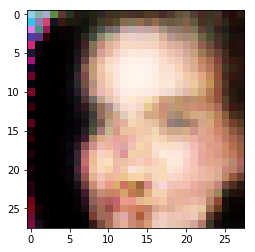

Epoch 1/2... Discriminator Loss: 1.4122... Generator Loss: 0.7315
Epoch 1/2... Discriminator Loss: 1.3693... Generator Loss: 0.7803
Epoch 1/2... Discriminator Loss: 1.3756... Generator Loss: 0.7814
Epoch 1/2... Discriminator Loss: 1.4416... Generator Loss: 0.6261
Epoch 1/2... Discriminator Loss: 1.4174... Generator Loss: 0.7246


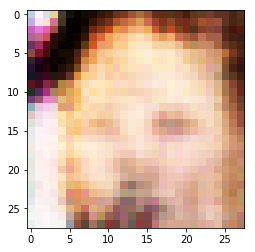

Epoch 1/2... Discriminator Loss: 1.4602... Generator Loss: 0.7180
Epoch 1/2... Discriminator Loss: 1.4703... Generator Loss: 0.5575
Epoch 1/2... Discriminator Loss: 1.3904... Generator Loss: 0.6361
Epoch 1/2... Discriminator Loss: 1.3522... Generator Loss: 0.8138
Epoch 1/2... Discriminator Loss: 1.4111... Generator Loss: 0.7501


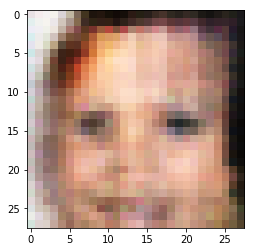

Epoch 1/2... Discriminator Loss: 1.3310... Generator Loss: 0.8387
Epoch 1/2... Discriminator Loss: 1.4604... Generator Loss: 0.5794
Epoch 1/2... Discriminator Loss: 1.4189... Generator Loss: 0.6925
Epoch 1/2... Discriminator Loss: 1.3820... Generator Loss: 0.8083
Epoch 1/2... Discriminator Loss: 1.4240... Generator Loss: 0.7222


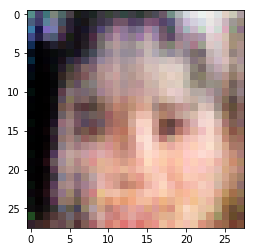

Epoch 1/2... Discriminator Loss: 1.3687... Generator Loss: 0.6887
Epoch 1/2... Discriminator Loss: 1.4420... Generator Loss: 0.8296
Epoch 1/2... Discriminator Loss: 1.5450... Generator Loss: 0.4970
Epoch 1/2... Discriminator Loss: 1.4121... Generator Loss: 0.8203
Epoch 1/2... Discriminator Loss: 1.3625... Generator Loss: 0.9092


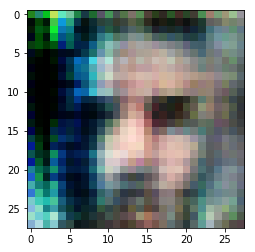

Epoch 1/2... Discriminator Loss: 1.3999... Generator Loss: 0.7082
Epoch 1/2... Discriminator Loss: 1.4086... Generator Loss: 0.8066
Epoch 1/2... Discriminator Loss: 1.4136... Generator Loss: 0.8827
Epoch 1/2... Discriminator Loss: 1.4295... Generator Loss: 0.6919
Epoch 1/2... Discriminator Loss: 1.4244... Generator Loss: 0.6958


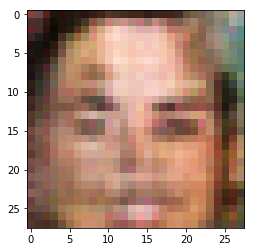

Epoch 1/2... Discriminator Loss: 1.3640... Generator Loss: 0.8763
Epoch 1/2... Discriminator Loss: 1.3767... Generator Loss: 0.7765
Epoch 1/2... Discriminator Loss: 1.4433... Generator Loss: 0.8581
Epoch 1/2... Discriminator Loss: 1.3310... Generator Loss: 0.8219
Epoch 1/2... Discriminator Loss: 1.5769... Generator Loss: 0.4276


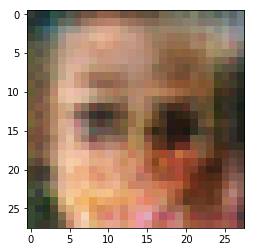

Epoch 1/2... Discriminator Loss: 1.3661... Generator Loss: 0.9896
Epoch 1/2... Discriminator Loss: 1.6167... Generator Loss: 0.5227
Epoch 1/2... Discriminator Loss: 1.4069... Generator Loss: 0.6527
Epoch 1/2... Discriminator Loss: 1.3691... Generator Loss: 0.8338
Epoch 1/2... Discriminator Loss: 1.4283... Generator Loss: 0.6022


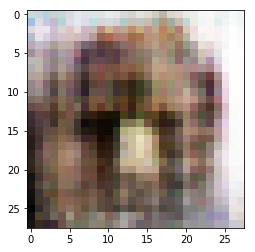

Epoch 1/2... Discriminator Loss: 1.3872... Generator Loss: 0.7573
Epoch 1/2... Discriminator Loss: 1.4116... Generator Loss: 0.8815
Epoch 1/2... Discriminator Loss: 1.3812... Generator Loss: 0.9521
Epoch 1/2... Discriminator Loss: 1.4586... Generator Loss: 0.6676
Epoch 1/2... Discriminator Loss: 1.4866... Generator Loss: 0.6214


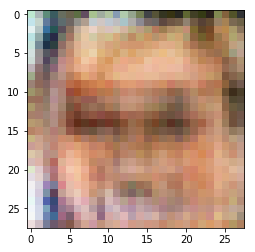

Epoch 1/2... Discriminator Loss: 1.4041... Generator Loss: 0.8660
Epoch 1/2... Discriminator Loss: 1.4487... Generator Loss: 0.5484
Epoch 1/2... Discriminator Loss: 1.4109... Generator Loss: 0.7726
Epoch 1/2... Discriminator Loss: 1.4401... Generator Loss: 0.8559
Epoch 1/2... Discriminator Loss: 1.4522... Generator Loss: 0.6376


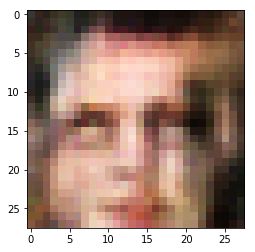

Epoch 1/2... Discriminator Loss: 1.3060... Generator Loss: 0.7318
Epoch 1/2... Discriminator Loss: 1.4266... Generator Loss: 0.6196
Epoch 1/2... Discriminator Loss: 1.4524... Generator Loss: 0.6751
Epoch 1/2... Discriminator Loss: 1.3306... Generator Loss: 0.7257
Epoch 1/2... Discriminator Loss: 1.3244... Generator Loss: 0.8903


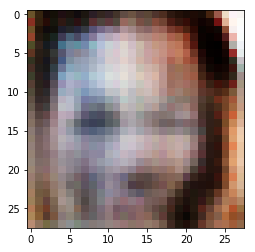

Epoch 1/2... Discriminator Loss: 1.5704... Generator Loss: 0.4800
Epoch 1/2... Discriminator Loss: 1.1903... Generator Loss: 0.6701
Epoch 1/2... Discriminator Loss: 1.6306... Generator Loss: 0.4298
Epoch 1/2... Discriminator Loss: 1.5312... Generator Loss: 1.2556
Epoch 1/2... Discriminator Loss: 1.6316... Generator Loss: 1.2263


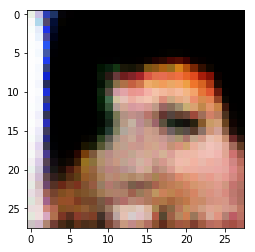

Epoch 1/2... Discriminator Loss: 1.1783... Generator Loss: 0.6864
Epoch 1/2... Discriminator Loss: 1.3632... Generator Loss: 0.7245
Epoch 1/2... Discriminator Loss: 1.3380... Generator Loss: 0.8444
Epoch 1/2... Discriminator Loss: 1.4542... Generator Loss: 0.8824
Epoch 1/2... Discriminator Loss: 1.3660... Generator Loss: 0.7552


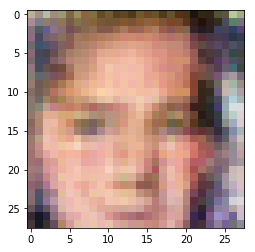

Epoch 1/2... Discriminator Loss: 1.3785... Generator Loss: 1.0252
Epoch 1/2... Discriminator Loss: 1.3415... Generator Loss: 0.7257
Epoch 1/2... Discriminator Loss: 1.4841... Generator Loss: 0.8706
Epoch 1/2... Discriminator Loss: 1.4009... Generator Loss: 0.7634
Epoch 1/2... Discriminator Loss: 1.3003... Generator Loss: 0.7674


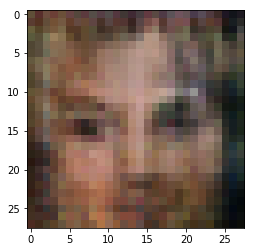

Epoch 1/2... Discriminator Loss: 1.4616... Generator Loss: 0.5883
Epoch 1/2... Discriminator Loss: 1.3852... Generator Loss: 0.7571
Epoch 1/2... Discriminator Loss: 1.4147... Generator Loss: 0.7370
Epoch 1/2... Discriminator Loss: 1.3985... Generator Loss: 0.5974
Epoch 1/2... Discriminator Loss: 1.3937... Generator Loss: 0.8337


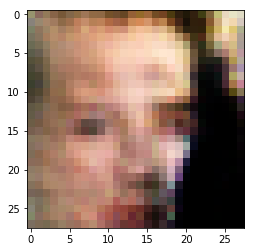

Epoch 1/2... Discriminator Loss: 1.3958... Generator Loss: 0.7501
Epoch 1/2... Discriminator Loss: 1.3674... Generator Loss: 0.7861
Epoch 1/2... Discriminator Loss: 1.4294... Generator Loss: 0.5855
Epoch 1/2... Discriminator Loss: 1.3957... Generator Loss: 0.7919
Epoch 1/2... Discriminator Loss: 1.4269... Generator Loss: 0.6628


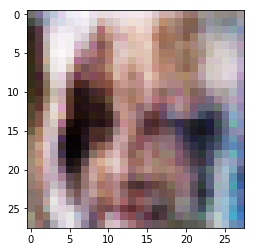

Epoch 1/2... Discriminator Loss: 1.4011... Generator Loss: 0.8791
Epoch 1/2... Discriminator Loss: 1.4309... Generator Loss: 0.7559
Epoch 1/2... Discriminator Loss: 1.4236... Generator Loss: 0.7932
Epoch 1/2... Discriminator Loss: 1.3721... Generator Loss: 0.9809
Epoch 1/2... Discriminator Loss: 1.2897... Generator Loss: 0.8318


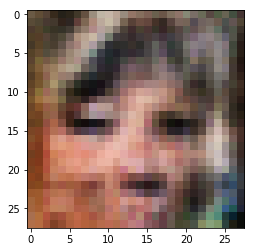

Epoch 1/2... Discriminator Loss: 1.3665... Generator Loss: 0.7595
Epoch 1/2... Discriminator Loss: 1.4150... Generator Loss: 0.7401
Epoch 1/2... Discriminator Loss: 1.3966... Generator Loss: 0.7917
Epoch 1/2... Discriminator Loss: 1.3612... Generator Loss: 0.7493
Epoch 1/2... Discriminator Loss: 1.3147... Generator Loss: 0.8233


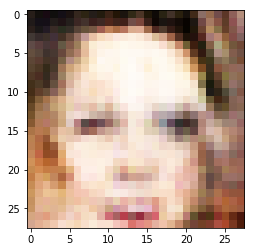

Epoch 1/2... Discriminator Loss: 1.4328... Generator Loss: 0.6838
Epoch 1/2... Discriminator Loss: 1.3576... Generator Loss: 0.8889
Epoch 1/2... Discriminator Loss: 1.3358... Generator Loss: 0.8453
Epoch 1/2... Discriminator Loss: 1.4032... Generator Loss: 0.6617
Epoch 1/2... Discriminator Loss: 1.4044... Generator Loss: 0.7901


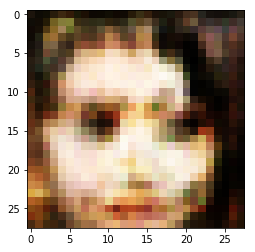

Epoch 1/2... Discriminator Loss: 1.3325... Generator Loss: 0.7457
Epoch 1/2... Discriminator Loss: 1.4150... Generator Loss: 0.7728
Epoch 1/2... Discriminator Loss: 1.3774... Generator Loss: 0.8202
Epoch 1/2... Discriminator Loss: 1.3571... Generator Loss: 0.8561
Epoch 1/2... Discriminator Loss: 1.3572... Generator Loss: 0.7147


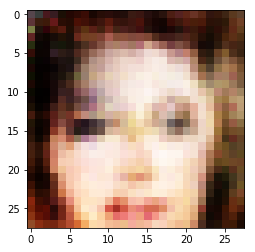

Epoch 1/2... Discriminator Loss: 1.4079... Generator Loss: 0.7662
Epoch 1/2... Discriminator Loss: 1.4697... Generator Loss: 0.7219
Epoch 1/2... Discriminator Loss: 1.3817... Generator Loss: 0.8137
Epoch 1/2... Discriminator Loss: 1.4946... Generator Loss: 0.5784
Epoch 1/2... Discriminator Loss: 1.4014... Generator Loss: 0.8050


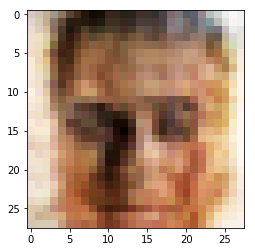

Epoch 1/2... Discriminator Loss: 1.3648... Generator Loss: 0.7005
Epoch 1/2... Discriminator Loss: 1.4046... Generator Loss: 0.7981
Epoch 1/2... Discriminator Loss: 1.3965... Generator Loss: 0.7313
Epoch 1/2... Discriminator Loss: 1.4003... Generator Loss: 0.8324
Epoch 1/2... Discriminator Loss: 1.3991... Generator Loss: 0.7966


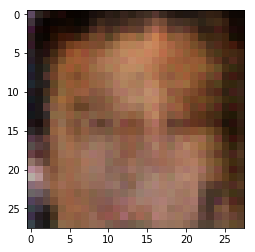

Epoch 1/2... Discriminator Loss: 1.4288... Generator Loss: 0.7051
Epoch 1/2... Discriminator Loss: 1.4102... Generator Loss: 0.8570
Epoch 1/2... Discriminator Loss: 1.3330... Generator Loss: 0.8303
Epoch 1/2... Discriminator Loss: 1.3767... Generator Loss: 0.6372
Epoch 1/2... Discriminator Loss: 1.3807... Generator Loss: 0.8638


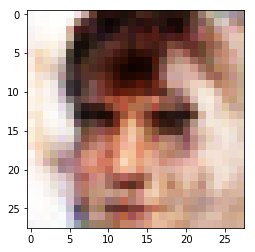

Epoch 1/2... Discriminator Loss: 1.4006... Generator Loss: 0.7130
Epoch 1/2... Discriminator Loss: 1.3861... Generator Loss: 0.8485
Epoch 1/2... Discriminator Loss: 1.4240... Generator Loss: 0.6595
Epoch 1/2... Discriminator Loss: 1.4637... Generator Loss: 0.7482
Epoch 1/2... Discriminator Loss: 1.4081... Generator Loss: 0.6168


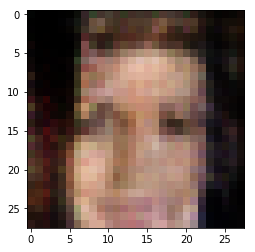

Epoch 1/2... Discriminator Loss: 1.4047... Generator Loss: 0.7593
Epoch 1/2... Discriminator Loss: 1.3796... Generator Loss: 0.7828
Epoch 1/2... Discriminator Loss: 1.4001... Generator Loss: 0.8098
Epoch 1/2... Discriminator Loss: 1.4122... Generator Loss: 0.7985
Epoch 1/2... Discriminator Loss: 1.1231... Generator Loss: 0.8677


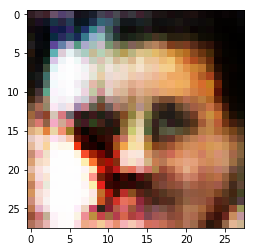

Epoch 1/2... Discriminator Loss: 1.5332... Generator Loss: 0.5804
Epoch 1/2... Discriminator Loss: 1.3448... Generator Loss: 0.8623
Epoch 1/2... Discriminator Loss: 1.3594... Generator Loss: 0.8545


In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.0008
beta1 = 0.1 #this was 0.3

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.